
## Image Classification: Jaguar vs Leopard

This image classifier will attempt to accurately distinguish between jaguars and leopards. The dataset contains 50 images of jaguars and 50 images of leopards.


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
bs = 16

Create a new dataset called Jaguar vs Leopard and upload the [jaguar_vs_leopard.zip](https://github.com/edkahara/fastai/blob/master/lesson 2/datasets/jaguar_vs_leopard.zip) file.

In [4]:
path = Path('../input/jaguar_vs_leopard/')
path.ls()

[PosixPath('../input/jaguar_vs_leopard/jaguar'),
 PosixPath('../input/jaguar_vs_leopard/leopard')]

In [5]:
np.random.seed(12)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2, ds_tfms=get_transforms(), size=224, bs=bs, num_workers=0).normalize(imagenet_stats)

In [6]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['jaguar', 'leopard'], 2, 80, 20)

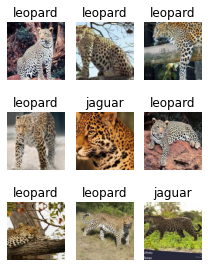

In [7]:
data.show_batch(rows=3, figsize=(3,4))

In [8]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, model_dir="/kaggle/working/")

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [17]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.176180,0.295433,0.100000,00:01
1,0.489492,1.045070,0.100000,00:01
2,0.462513,0.612711,0.100000,00:01
3,0.401721,0.730942,0.200000,00:01


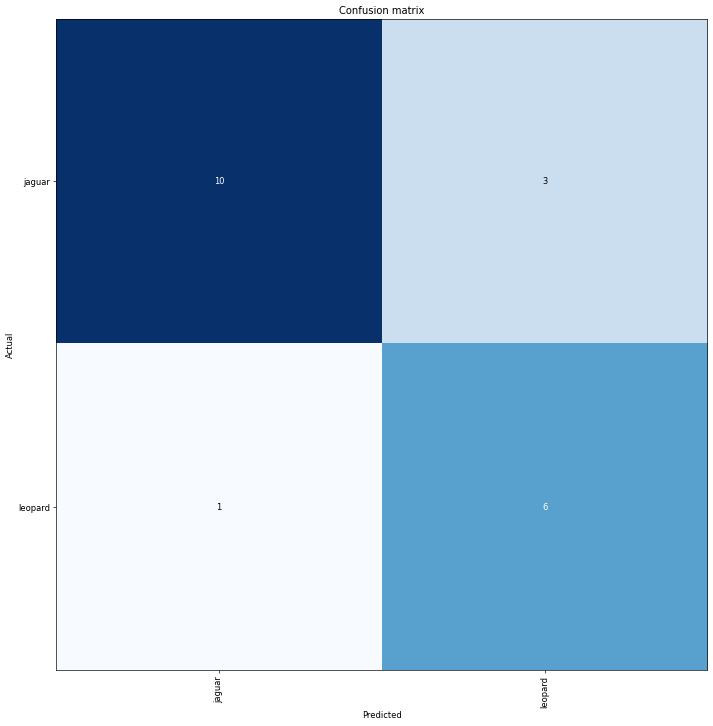

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


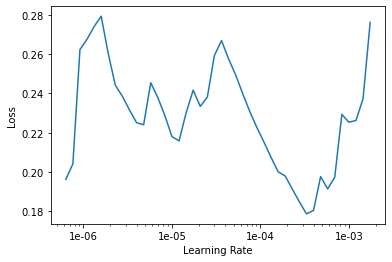

In [20]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [23]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.277617,0.028730,0.000000,00:02
1,0.201991,0.086146,0.050000,00:01


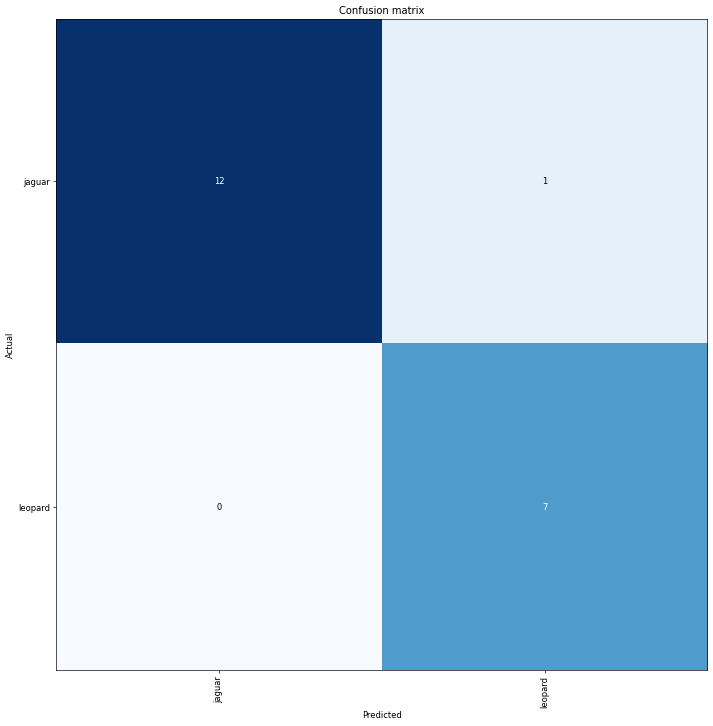

In [24]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [28]:
learn.export('/kaggle/working/export.pkl')

In [29]:
learn = load_learner('/kaggle/working/')

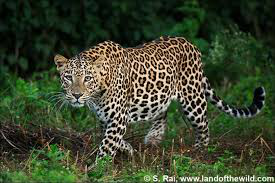

In [30]:
img = open_image(path/'leopard'/'Z.jpg')
img

In [31]:
pred_class,pred_idx,outputs = learn.predict(img)
print(pred_class)

leopard


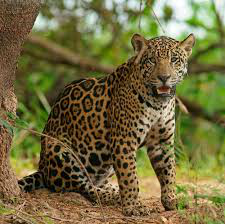

In [32]:
img2 = open_image(path/'jaguar'/'Z.jpg')
img2

In [33]:
pred_class,pred_idx,outputs = learn.predict(img2)
print(pred_class)

jaguar
